<a href="https://colab.research.google.com/github/isa-dgc/ML/blob/main/Exemplos_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tipos de Aprendizado de Máquina que serão abordados:
*   Regressão Linear - ok - área financeira
*   Random Forest - ok - cotidiano
*   SVM - ok - saúde
*   K-means - ok - manufatura
*   KNN - ok - agro


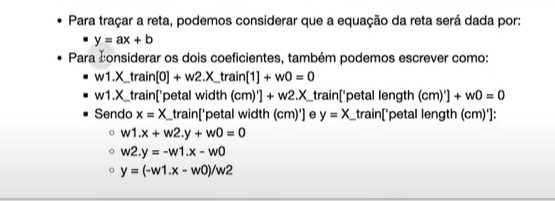

# Regressão Linear

A regressão linear é um método estatístico amplamente utilizado para modelar a relação entre uma variável dependente e uma ou mais variáveis independentes. No caso específico de preços de casas, a regressão linear pode ser aplicada para entender como características como área, número de quartos e quantidade de banheiros influenciam o preço das casas. O modelo de regressão linear busca encontrar a melhor reta que minimize a diferença entre os valores previstos pelo modelo e os valores reais do preço das casas.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Para uma casa com área 200, 2 quartos e 1 banheiros, a previsão é de preço R$262.73
 
Para uma casa com área 150, 3 quartos e 2 banheiros, a previsão é de preço R$264.48
 


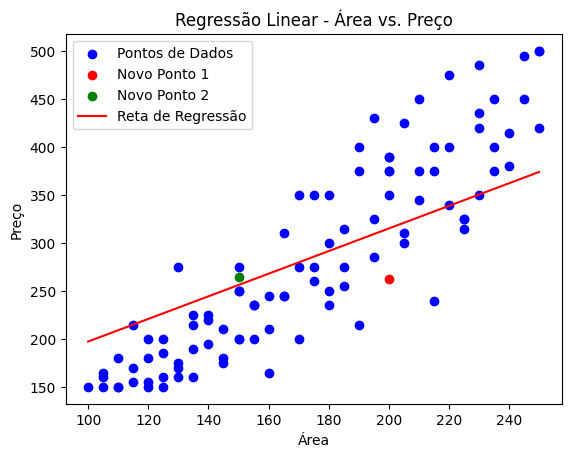

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados da casa a partir do arquivo CSV
data = pd.read_csv('casa_RL.csv', sep = ";")

# print(data)

# Separar as variáveis independentes (área, quartos e banheiros)
X = data[['area', 'quartos', 'banheiros']]

# Separar a variável dependente (preço)
y = data['preco']

# Criar uma instância do modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X, y)

# Obter os coeficientes estimados da regressão
coefficients = model.coef_
intercept = model.intercept_

# Fazer previsões para novas casas
new_X = [[200, 2, 1], [150, 3, 2]]
predictions = model.predict(new_X)

# Imprimir as previsões
for x, prediction in zip(new_X, predictions):
    print(f"Para uma casa com área {x[0]}, {x[1]} quartos e {x[2]} banheiros, a previsão é de preço R${prediction:.2f}")
    print(" ")

# Plotar o gráfico
fig, ax = plt.subplots()
ax.scatter(X['area'], y, color='blue', label='Pontos de Dados')  # Pontos de dados
ax.scatter(new_X[0][0], predictions[0], color='red', label='Novo Ponto 1')  # Novo ponto 1
ax.scatter(new_X[1][0], predictions[1], color='green', label='Novo Ponto 2')  # Novo ponto 2
ax.set_xlabel('Área')
ax.set_ylabel('Preço')
ax.set_title('Regressão Linear - Área vs. Preço')

# Gerar os valores preditos usando a equação da reta de regressão
x_vals = np.linspace(X['area'].min(), X['area'].max(), 100)
y_pred = intercept + coefficients[0] * x_vals + coefficients[1] * X['quartos'].mean() + coefficients[2] * X['banheiros'].mean()

# Plotar a reta de regressão
plt.plot(x_vals, y_pred, color='red', label='Reta de Regressão')

ax.legend()
plt.show()

# Random Forest

Random Forest é um algoritmo de aprendizado de máquina que utiliza várias árvores de decisão para realizar a classificação ou regressão. Na aplicação de recomendação de streaming de música, a Random Forest pode analisar características como gênero, ano e popularidade das músicas para classificar os usuários em grupos de risco. Com base nesses grupos, é possível fazer recomendações personalizadas, ajudando os usuários a descobrir novas músicas com maior probabilidade de agradá-los.

   Gênero   Ano  Popularidade  Gostou
0       1  2019             8       1
1       0  2005             6       0
2       2  2020             7       1
3       1  2018             9       1
4       0  1999             5       0
Você pode gostar dessa música? Sim


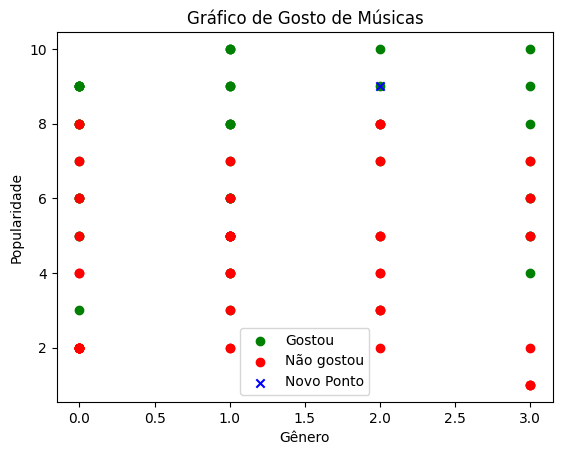

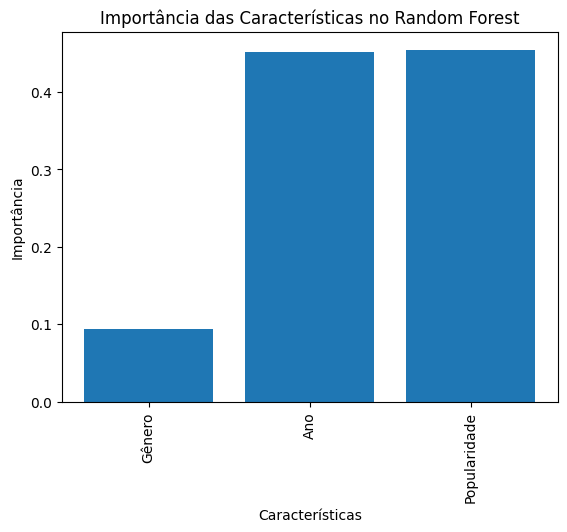

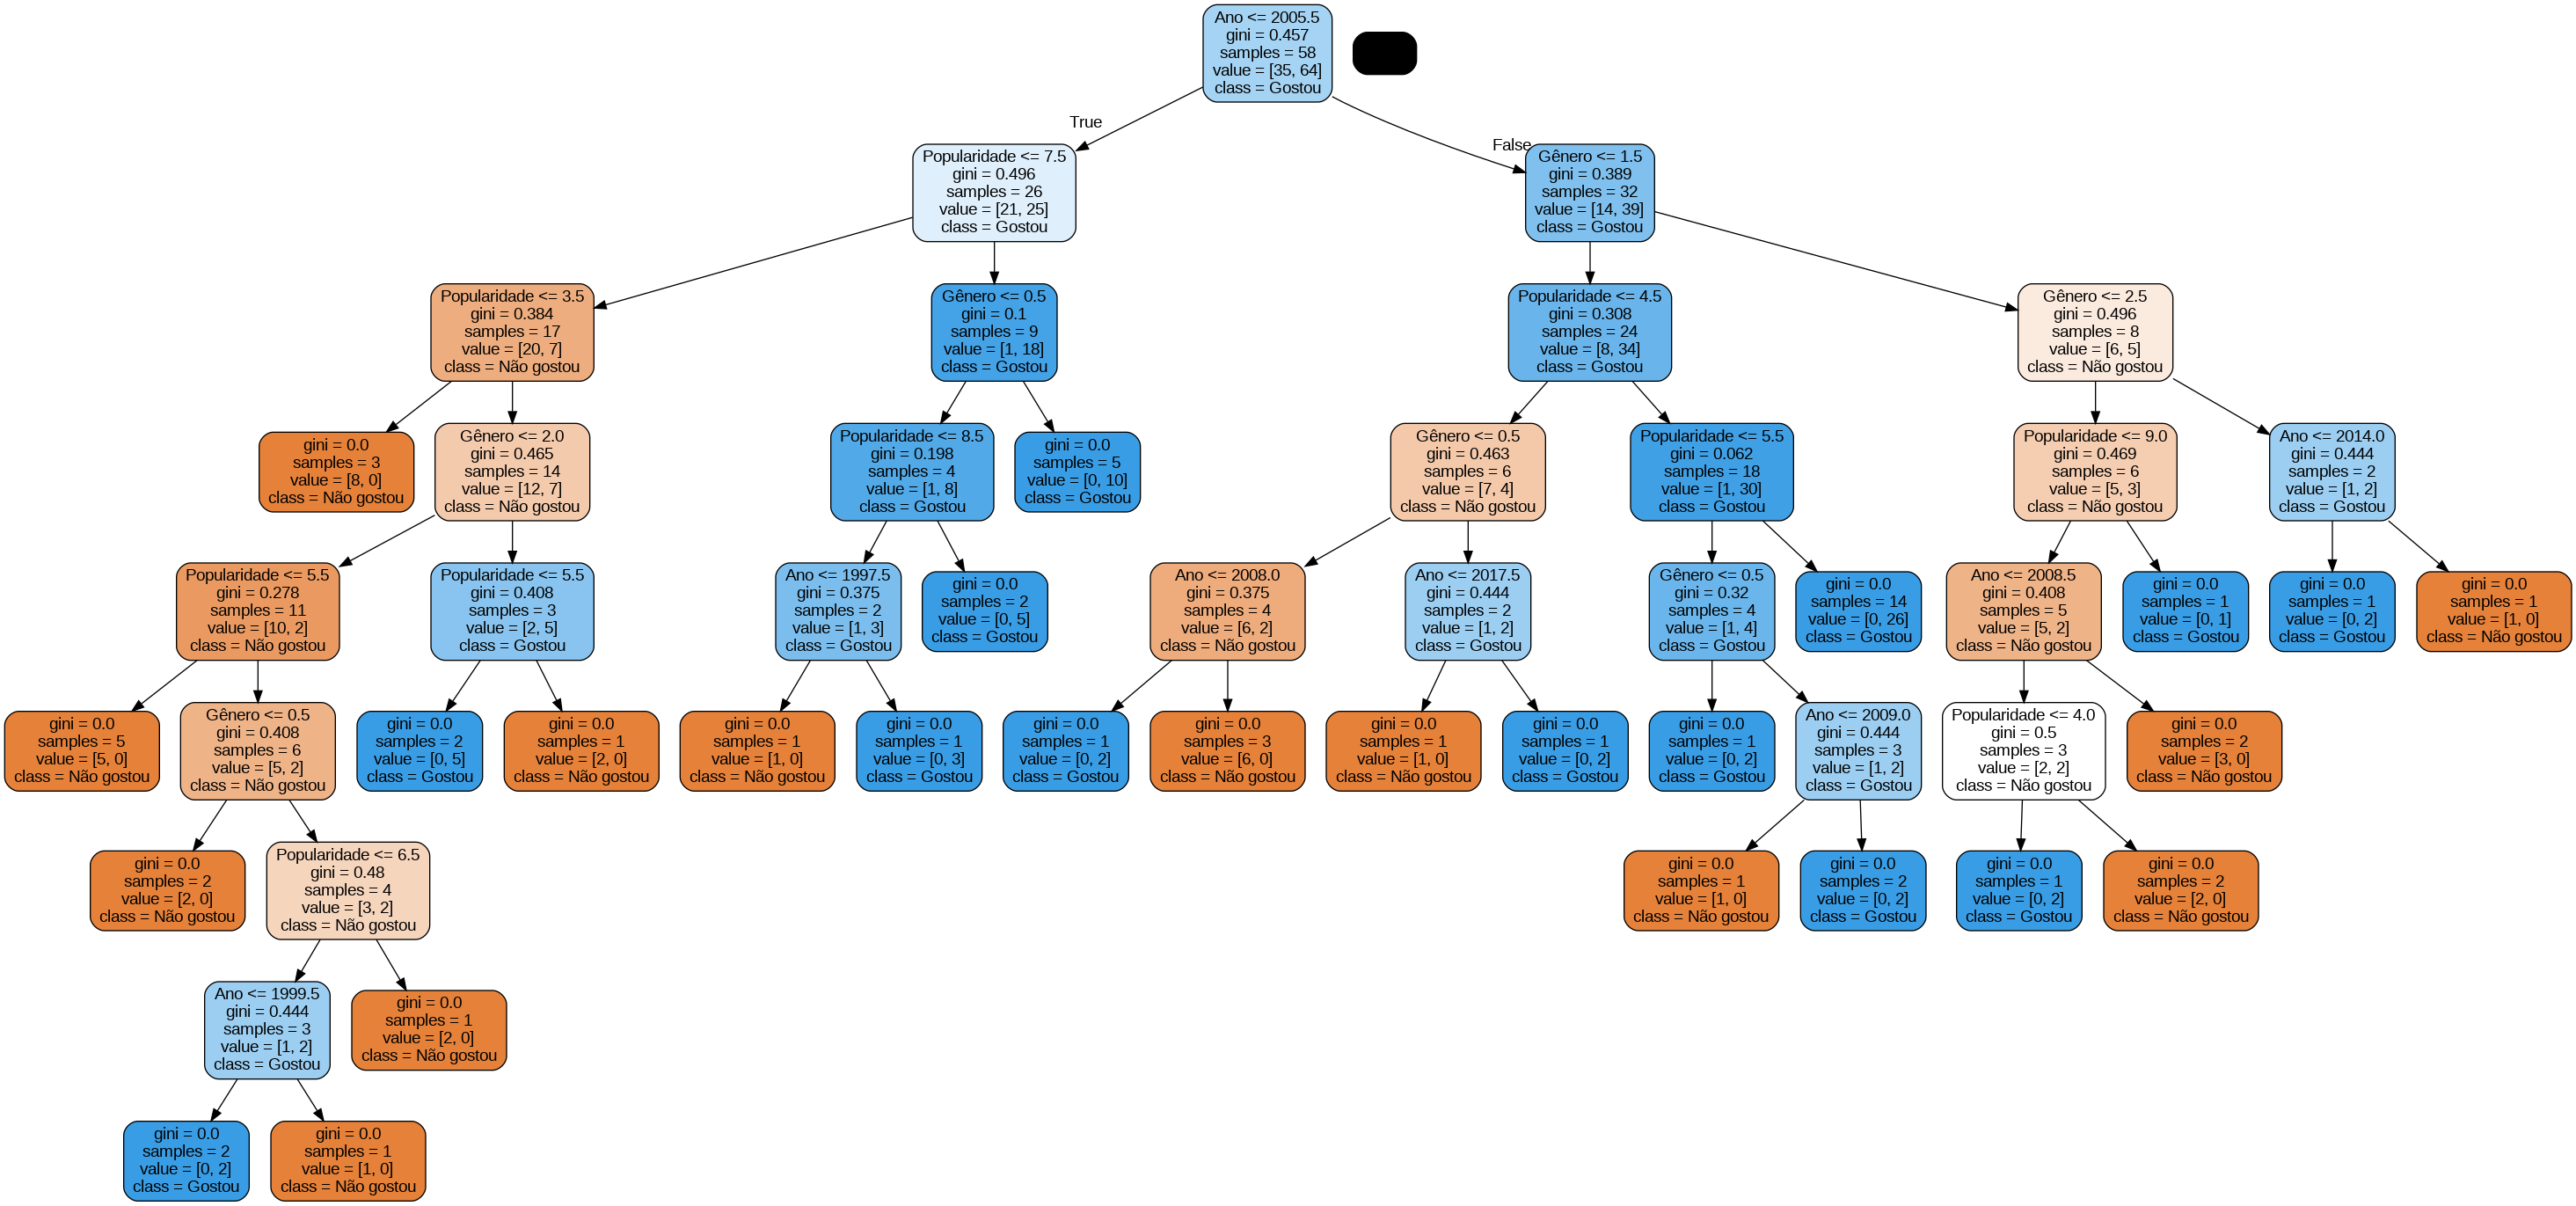

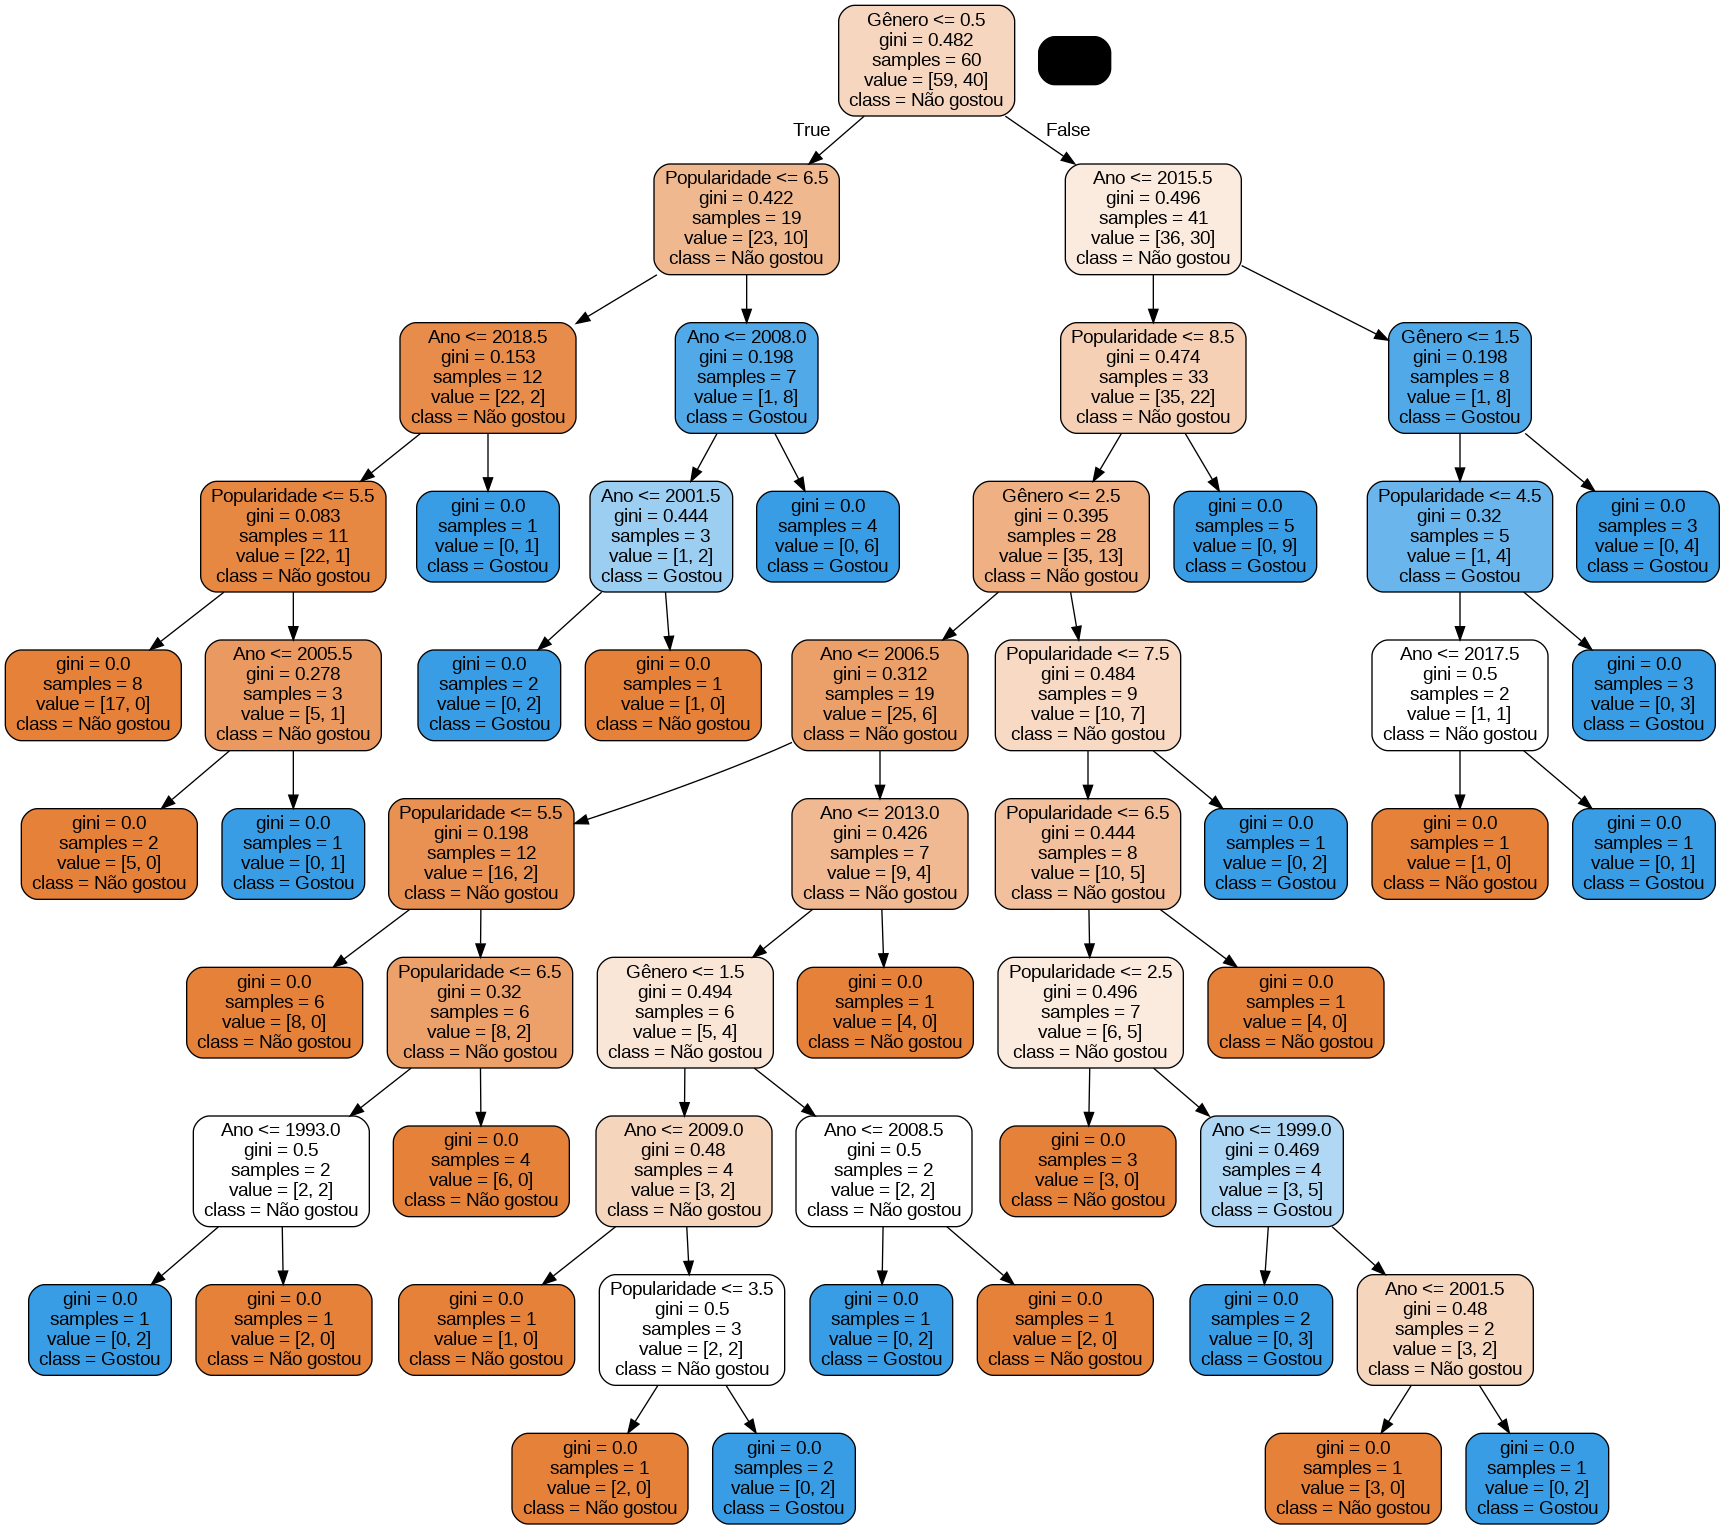

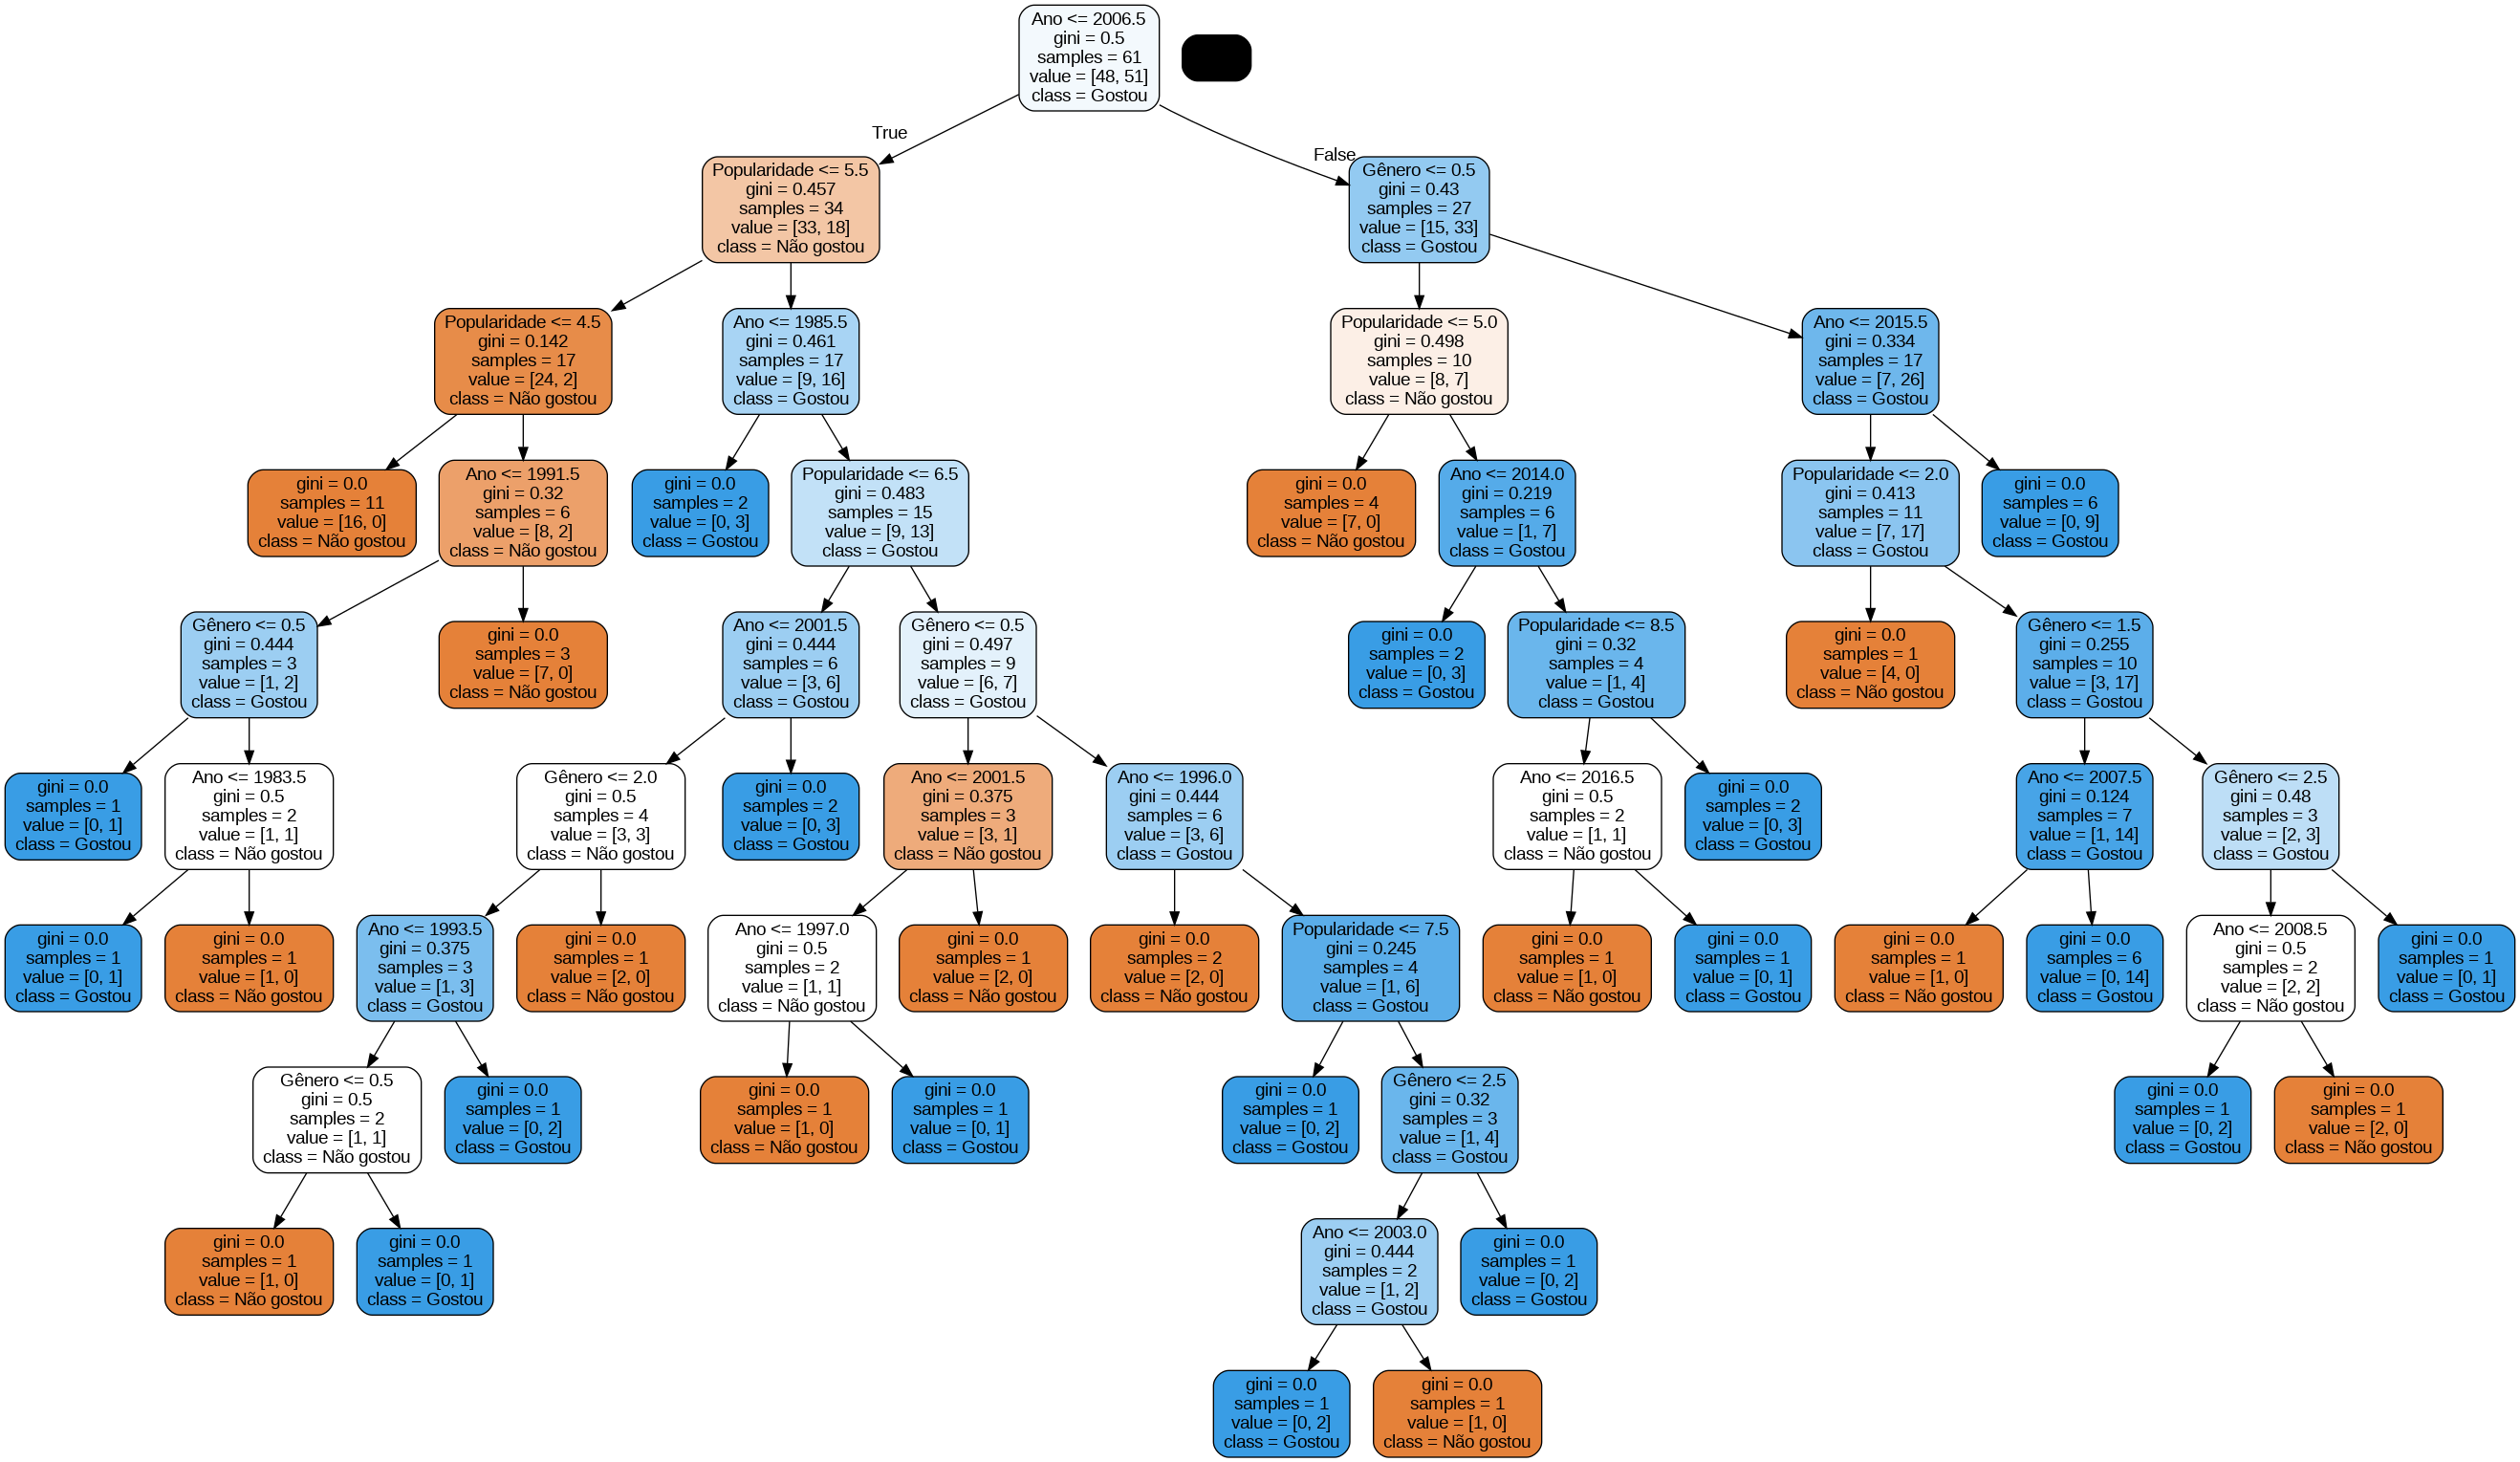

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree
import pydotplus
from IPython.display import Image

# Carregar os dados de treinamento
data = pd.read_csv('recomendacao_RF.csv', sep = ";")

# Mapear 'sim' para 1 e 'não' para 0 na coluna 'Gostou'
data['Gostou'] = data['Gostou'].map({'Sim': 1, 'Não': 0})

# Definir o mapeamento das categorias para números inteiros
mapeamento = {'Rock': 0, 'Pop': 1, 'Hip Hop': 2, 'Jazz' : 3}

# Realizar a codificação de números inteiros para a coluna 'Gênero'
data['Gênero'] = data['Gênero'].map(mapeamento)

# Exibir os dados com a coluna codificada
print(data.head())

# Separar as características (X) e os rótulos (y)
X = data.drop('Gostou', axis=1).values
y = data['Gostou'].values

# Criar e treinar o modelo Random Forest
model = RandomForestClassifier()
model.fit(X, y)

# Dados de um usuário novo para fazer a recomendação
usuario_novo = np.array([[2, 2017, 9]])

# Fazer a previsão de gostar ou não da música recomendada
# Mapear 'sim' para 1 e 'não' para 0 na previsão
previsao = model.predict(usuario_novo)
previsao = 'Sim' if previsao[0] == 1 else 'Não'

# Exibir a recomendação
print(f"Você pode gostar dessa música? {previsao}")

# Segmentar os dados por categoria de previsão
sim = data[data['Gostou'] == 1]
nao = data[data['Gostou'] == 0]

# # # Criar um gráfico de dispersão para cada categoria
plt.scatter(sim['Gênero'], sim['Popularidade'], c='green', label='Gostou')
plt.scatter(nao['Gênero'], nao['Popularidade'], c='red', label='Não gostou')
plt.scatter(usuario_novo[0][0], usuario_novo[0][2], marker='x', c='blue', label='Novo Ponto')

# # Configurar os eixos e o título do gráfico
plt.xlabel('Gênero')
plt.ylabel('Popularidade')
plt.title('Gráfico de Gosto de Músicas')

# Legenda
plt.legend()

# Exibir o gráfico
plt.show()

# Obter a importância das características do modelo
importancias = model.feature_importances_

# Obter os nomes das características
nomes_caracteristicas = data.columns[:-1]

# Criar o gráfico de barras
plt.bar(nomes_caracteristicas, importancias)
plt.xlabel('Características')
plt.ylabel('Importância')
plt.title('Importância das Características no Random Forest')
plt.xticks(rotation='vertical')
plt.show()

# Índices das árvores de decisão específicas que deseja visualizar
indices_arvores = [0, 2, 4]  # Por exemplo, exibir as árvores 1, 3 e 5

# Exibir as árvores de decisão específicas
for i in indices_arvores:
    arvore = model.estimators_[i]
    dot_data = tree.export_graphviz(arvore, out_file=None,
                                    feature_names=data.columns[:-1],
                                    class_names=['Não gostou', 'Gostou'],
                                    filled=True, rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    display(Image(graph.create_png()))

# Exibir as árvores de decisão individuais
# for i, arvore in enumerate(model.estimators_):
#     dot_data = tree.export_graphviz(arvore, out_file=None,
#                                     feature_names=data.columns[:-1],
#                                     class_names=['Não gostou', 'Gostou'],
#                                     filled=True, rounded=True)
#     graph = pydotplus.graph_from_dot_data(dot_data)
#     display(Image(graph.create_png()))

# SVM

O Support Vector Machine (SVM) é um algoritmo de aprendizado de máquina supervisionado que é frequentemente utilizado para problemas de classificação. Na divisão de grupos de risco em um contexto de saúde, o SVM pode ser aplicado para prever se um indivíduo pertence a um determinado grupo de risco com base em características relevantes.

Acurácia: 1.0
Previsão do Grupo de Risco: ['Baixo risco']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


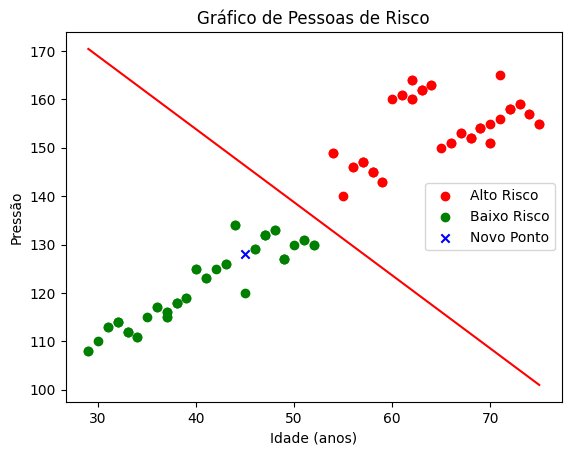

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados
data = pd.read_csv('grupo_risco_SVM.csv', sep = ";")

# Separar as características (X) e os rótulos (y)
X = data[['Idade', 'Pressão', 'Colesterol']]
y = data['Grupo de Risco']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo SVM
svm_model = SVC(kernel = 'linear')

# Treinar o modelo
svm_model.fit(X_train, y_train)

w1 = svm_model.coef_[0][0]
w2 = svm_model.coef_[0][1]
w3 = svm_model.coef_[0][2]
w0 = svm_model.intercept_[0]

# Fazer previsões nos dados de teste
y_pred = svm_model.predict(X_test)

# Avaliar o desempenho do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

# Valor novo para previsão
novo_dado = [[45, 128, 220]]

# # Fazer a previsão
previsao = svm_model.predict(novo_dado)

# # Exibir a previsão
print("Previsão do Grupo de Risco:", previsao)

# #########################################################
# Segmentar os dados por categoria de previsão
alto = data[data['Grupo de Risco'] == 'Alto risco']
baixo = data[data['Grupo de Risco'] == 'Baixo risco']
fig, ax = plt.subplots()
# Criar um gráfico de dispersão para cada categoria
plt.scatter(alto['Idade'], alto['Pressão'], c='red', label='Alto Risco')
plt.scatter(baixo['Idade'], baixo['Pressão'], c='green', label='Baixo Risco')
plt.scatter(novo_dado[0][0], novo_dado[0][1], marker='x', c='blue', label='Novo Ponto')

x = np.linspace(X['Idade'].min(),X['Idade'].max(),100)
z = np.linspace(X['Colesterol'].min(),X['Colesterol'].max(),100)
y = (-w1*x-w0-w3*z)/w2
ax.plot(x,y,'r')


# Configurar os eixos e o título do gráfico
plt.xlabel('Idade (anos)')
plt.ylabel('Pressão')
plt.title('Gráfico de Pessoas de Risco')

# Legenda
plt.legend()

# Exibir o gráfico
plt.show()

# K-means

O algoritmo K-means pode ser utilizado na manutenção preventiva na manufatura como uma técnica de agrupamento de dados que pode ajudar a identificar padrões e anomalias nos dados coletados de sensores e equipamentos industriais. A manutenção preventiva tem como objetivo reduzir o risco de falhas e maximizar a disponibilidade e a vida útil dos equipamentos.

Ao utilizar o K-means na manutenção preventiva na manufatura, é possível identificar padrões nos dados e antecipar falhas ou condições anormais antes que elas ocorram. Isso ajuda a otimizar os recursos de manutenção, reduzir custos e minimizar o tempo de inatividade não planejado. Além disso, a análise dos clusters pode fornecer insights valiosos sobre o comportamento dos equipamentos, auxiliando no planejamento de melhorias e na tomada de decisões estratégicas para aumentar a eficiência e a confiabilidade dos processos de manufatura.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Carregar os dados de histórico de falhas e manutenção
data = pd.read_csv('manutencao_K_means.csv', sep=";")

# Selecionar as características relevantes
X = data[['Temperatura', 'Pressão', 'Vibração']].values

# Definir o número de clusters desejado
num_clusters = 2

# Executar o algoritmo K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=None)
kmeans.fit(X)

# Visualizar os resultados
# print(data)

# Valor novo para teste
novo_valor = [33, 104, 0.15]

# Prever o cluster do novo valor
novo_valor_cluster = kmeans.predict([novo_valor])

print(kmeans.labels_)
print(novo_valor_cluster)

fig,ax = plt.subplots()

# Configurar os eixos e o título do gráfico
plt.xlabel('Temperatura (°C)')
plt.ylabel('Pressão (atm)')
plt.title('Gráfico de Manutenção')

ax.scatter(data[['Temperatura']], data[['Pressão']], c=kmeans.labels_)
plt.scatter(novo_valor[0], novo_valor[1], marker='x', c='red', label='Novo Ponto')


# Legenda
plt.legend()
# Exibir o gráfico
plt.show()

# KNN

Uma aplicação do algoritmo KNN (K-Nearest Neighbors) no cotidiano é a previsão do tempo com base em dados históricos. O KNN pode ser usado para prever o tempo de um determinado dia com base nas informações de dias anteriores, como temperatura, umidade, pressão atmosférica, entre outros.

Nesse caso, o algoritmo utiliza os dados históricos para identificar os k dias mais semelhantes ao dia atual em termos de características climáticas. Com base nas previsões desses dias similares, ele pode fazer uma previsão para o dia atual. Por exemplo, se os dias semelhantes tiveram um clima ensolarado, o KNN pode prever que o dia atual também será ensolarado.


Previsão: ['Nublado']


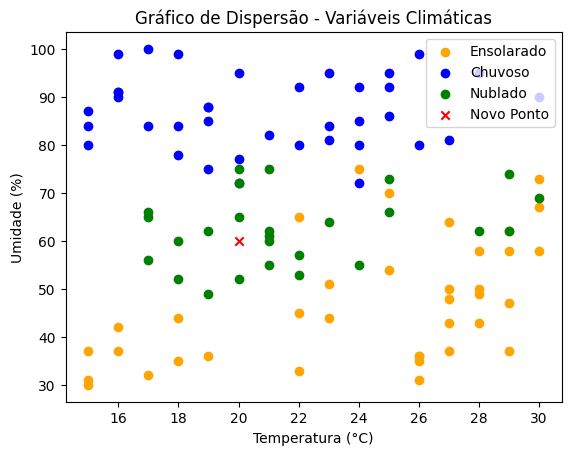

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
df = pd.read_csv('clima_KNN.csv', sep = ";")

# Separar os dados de entrada (variáveis climáticas) e saída (previsão)
X = df.iloc[:, 1:-1]  # Selecionar todas as colunas, exceto a primeira (Dia) e a última (Previsão)
y = df['Previsão']    # Selecionar a coluna Previsão

# Criar um modelo KNN com k=3
knn = KNeighborsClassifier(n_neighbors=5)

# Treinar o modelo
knn.fit(X, y)

# Exemplo de novos dados para prever o clima
novo_dia = pd.DataFrame([[20, 60, 1014]], columns=['Temperatura', 'Umidade', 'Pressão Atmosférica'])

# Prever o clima do novo dia
previsao = knn.predict(novo_dia)

print('Previsão:', previsao)

# Segmentar os dados por categoria de previsão
ensolarado = df[df['Previsão'] == 'Ensolarado']
chuvoso = df[df['Previsão'] == 'Chuvoso']
nublado = df[df['Previsão'] == 'Nublado']

# Criar um gráfico de dispersão para cada categoria
plt.scatter(ensolarado['Temperatura'], ensolarado['Umidade'], c='orange', label='Ensolarado')
plt.scatter(chuvoso['Temperatura'], chuvoso['Umidade'], c='blue', label='Chuvoso')
plt.scatter(nublado['Temperatura'], nublado['Umidade'], c='green', label='Nublado')
plt.scatter(novo_dia['Temperatura'], novo_dia['Umidade'], marker='x', c='red', label='Novo Ponto')

# Configurar os eixos e o título do gráfico
plt.xlabel('Temperatura (°C)')
plt.ylabel('Umidade (%)')
plt.title('Gráfico de Dispersão - Variáveis Climáticas')

# Legenda
plt.legend()

# Exibir o gráfico
plt.show()

In [ ]:
# questao
idade = 33
idade + 5
print(idade)
idade = idade + 5
print(idade)

33
38


In [ ]:
sabores = ['morango', 'limão', 'chocolate', 'creme', 'menta']
print(sabores[4])
print(sabores[5])

menta


IndexError: ignored

In [ ]:
frutas = ['laranja','banana','maça','limão','kiwi']
frutas[3:]

['limão', 'kiwi']

In [ ]:
roupas = ['sapato', 'camiseta', 'pulseira', 'brincos', 'touca']
roupas[-3:]

['pulseira', 'brincos', 'touca']

In [ ]:
cores = ['rosa', 'roxo', 'amarelo']
cores[0] = 'azul'
cores

['azul', 'roxo', 'amarelo']